In [1]:
import random
import matplotlib.pyplot as plt
import math
import copy
import random

In [2]:
x = [13.4, 84.7, 76.3, 25.5, 49.5, 44.9, 65.1, 78.8, 9.3, 2.8, 83.5, 43.2, 76.2, 0.2, 44.5, 72.1, 22.8]
y = [2.5, 54.1, 93.9, 38.1, 21.6, 42.2, 2.9, 22.1, 43.7, 49.5, 23.3, 23.0, 21.8, 45.9, 28.9, 2.1, 83.7]
e = [0, 328, 213, 133, 911, 642, 56, 500, 578, 839, 952, 897, 292, 588, 891, 68, 795]
l = [1000, 378, 265, 272, 1000, 720, 74, 599, 619, 867, 1034, 976, 345, 639, 988, 139, 854]
phi = [0, 15.1, 15.7, 11.8, 25.4, 25.1, 10.1, 48.5, 13.6, 10.0, 35.6, 35.9, 26.5, 25.5, 48.5, 35.6, 29.5]

In [3]:
v=1
ptrans = 10
mass = 1000
f_coeff = 0.032
cd = 0.28
area = 1.87
coeff_correction = 0.05
efficiency = 0.8
taumax = 0.999
taumin = 0.001
n = 17
kbw = 10
mu = 1.5
q0 = 0
rho = 0.1
cost = [[0]*n for _ in range(n)]
Tau = [[0.5]*n for _ in range(n)]
eta = [[0]*n for _ in range(n)]

In [4]:
def etravel(t):
  fw = (cd*area*coeff_correction*v*v)/2
  ff = mass*9.8*f_coeff
  return ((ff+fw)*v*t)/(efficiency)

In [5]:
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [6]:
for i in range(n):
    for j in range(n):
        cost[i][j] = euclidean_distance(x[i], y[i], x[j], y[j])

In [7]:
def f(p):
    sum = 0
    for i in range(1, len(p)):
        sum += cost[p[i-1]][p[i]]
    return sum

In [8]:
def violations(a):
    A = [0]*n
    D = [0]*n
    for i in range(1, len(a)-1):
        A[a[i]] = D[a[i-1]] + cost[a[i-1]][a[i]]
        D[a[i]] = max(A[a[i]], e[a[i]])
    w = 0
    for i in range(n):
        if(A[i] > l[i]):
          w += 1
    return w

In [9]:
def lex(p1, p2):
      if(len(p2) == 0):
            return 1
      v1 = violations(p1)
      v2 = violations(p2)
      f1 = f(p1)
      f2 = f(p2)
      if(v2 > v1+1):
          return 1
      elif(v1 > v2):
          return 2
      else:
          if(f1 <= f2):
              return 1
          else:
              return 2

In [10]:
emax = lmax = phimax = -1
emin = lmin = phimin = 100000
for i in range(n):
    emax = max(emax, e[i])
    emin = min(emin, e[i])
    phimin = min(phimin, phi[i])
    phimax = max(phimax, phi[i])
for i in range(n):
    lmax = max(lmax, l[i])
    lmin = min(lmin, l[i])
cmax = -1
cmin = 100000000000
for i in range(n):
    for j in range(n):
        cmax = max(cmax, cost[i][j])
        cmin = min(cmin, cost[i][j])

In [11]:
def generate_four_numbers_sum_1():
    num1 = random.uniform(0, 1)
    num2 = random.uniform(0, 1 - num1)
    num3 = random.uniform(0, 1 - num1 - num2)
    num4 = 1 - num1 - num2 - num3
    return num1, num2, num3, num4

In [12]:
def getprod(p, eta, Tau):
    parent = p[len(p)-2]
    child =  p[len(p)-1]
    tau = Tau[parent][child]
    ranksum = 0
    for i in range(len(p)-1):
        sorted_list = sorted(eta[p[i]], reverse = True)
        element = eta[p[i]][p[i+1]]
        rank = sorted_list.index(element) + 1
        ranksum += rank

    return tau/ranksum

In [13]:
def C(b, eta, Tau):
    c = []
    for i in range(len(b)):
        if(len(b[i]) == n):
            bp = copy.deepcopy(b[i])
            bp.append(0)
            c.append(bp)
        for j in range(1, n):
            bp = copy.deepcopy(b[i])
            if j in bp:
                continue
            else:
                bp.append(j)
                c.append(bp)

    prod = []
    for i in range(len(c)):
        pv = getprod(c[i], eta, Tau)
        prod.append([pv, c[i]])
        prod.sort(key=lambda x: x[0], reverse = True)

    return c, prod

In [14]:
def choosefrom(prod):
      q = random.random()
      if(q <= q0):
            selected_element = prod[0][1]
      else:
          total = sum(item[0] for item in prod)
          rand_num = random.uniform(0, total)
          cumulative_prob = 0
          for item in prod:
              cumulative_prob += item[0]
              if rand_num < cumulative_prob:
                  selected_element = item[1]
                  break
      return selected_element

In [15]:
def make_eta(hc, hl, he, hp):
    eta = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            eta[i][j] = hc*(cmax-cost[i][j])/(cmax-cmin) + hl*(lmax-l[j])/(lmax-lmin) + he*(emax-e[j])/(emax-emin) + hp*(phimax-e[j])/(phimax-phimin)
    return eta

In [16]:
def checkcf(cf, bs_update):
    if(bs_update == True):
        return  0, 0, 1
    else:
        if(cf < 0.4):
            return 1, 0, 0
        elif (cf < 0.6):
            return 2/3, 1/3, 0
        elif (cf < 0.8):
            return 1/3, 2/3, 0
        else:
            return 0, 1, 0

In [17]:
def ApplyPheromoneUpdate(cf, bs_update, Tau, pib, prb, pbf):
    kib, krb, kbf = checkcf(cf, bs_update)
    eps = [[0] * n for _ in range(n)]
    Pib = Prb = Pbf = 0
    for i in range(n):
        for j in range(n):
            if(pib.index(j) > pib.index(i)):
                Pib = 1
            if(prb.index(j) > prb.index(i)):
                Prb = 1
            if(pbf.index(j) > pbf.index(i)):
                Pbf = 1
            eps[i][j] = kib*Pib + krb*Prb + kbf*Pbf

    for i in range(n):
        for j in range(n):
            Tau[i][j] = Tau[i][j] + rho*(eps[i][j] - Tau[i][j])

In [18]:
def ComputeConvergenceFactor(Tau):
    sum = 0
    for i in range(n):
        for j in range(n):
            sum += max(taumax-Tau[i][j], Tau[i][j]-taumin)
    den = n*n*(taumax-taumin)
    div = sum/den
    cf = 2*(div - 0.5)
    return cf

In [19]:
def is_time_window_infeasible(i, j):
    if(e[i] + cost[i][j] > l[j]):
        return True
    else:
        return False

In [20]:
def pbs(kbw, mu, Tau):
      b = [[0]]
      hc, hl, he, hp = generate_four_numbers_sum_1()
      eta = make_eta(hc, hl, he, hp)
      bfinal = []
      for t in range(n):
          c, prod = C(b, eta, Tau)
          b = []
          for  k in range(min(int(mu*kbw), len(c))):
              pj = choosefrom(prod)
              b.append(pj)
              c.remove(pj)
              for i in range(len(prod)):
                  if(prod[i][1] == pj):
                      prod.pop(i)
                      break
          b = b[:kbw]
      vio = []
      for i in range(kbw):
          vio.append([violations(b[i]), i])
      vio.sort(key=lambda x: x[0])
      return b[vio[0][1]]

In [21]:
def swap(a, k):
    x = a[k]
    a[k] = a[k+1]
    a[k+1] =  x
    return a

In [22]:
def localsearch(p):
    p_best = p
    for k in range(1, n-1):
        p1 = p
        if (is_time_window_infeasible(p1[k], p1[k + 1]) == False):
           p1 = swap(p1, k)
           val = lex(p1, p_best)
           if val == 1 :
              p_best = p1
           p2 = p1
           for d in range(k + 1, n-1):
               if (is_time_window_infeasible(p1[d], p1[d + 1])):
                  break
               p1 = swap(p1, d)
               val = lex(p1, p_best)
               if val == 1 :
                  p_best = p1
           p1 = p2
           for d in range(k - 1, 0, -1):
               if (is_time_window_infeasible(p1[d], p1[d+1])):
                  break
               p1 = swap(p1, d)
               val2 = lex(p1, p_best)
               if val2 == 1 :
                  p_best = p1
    return p_best

In [23]:
data = []

In [24]:
def beam_aco(kbw, mu, q0, Tau):
    pbf = []
    prb = []
    cf = 0
    isend = False
    for i in range(n):
        for j in range(n):
            Tau[i][j] = 0.5
    for k in range(50000):
        pib = pbs(kbw, mu, Tau)
        if (lex(pib, prb) == 1):
            prb = pib
        if(lex(pib, pbf) == 1):
            pbf = pib
        cf = ComputeConvergenceFactor(Tau)
        if (isend == True and cf > 0.99):
            for i in range(n):
                for j in range(n):
                    Tau[i][j] = 0.5
            data.append(f(pbf))
            isend = False
        else:
            if(cf > 0.99):
                isend = True
            ApplyPheromoneUpdate(cf, isend, Tau, pib, prb, pbf)
    return pbf

In [25]:
pbf = beam_aco(kbw, mu, q0, Tau)

In [26]:
print(data)

[697.1185733054492, 677.3387967700254, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 835.2119661115037, 674.5045350563422, 674.5045350563422, 674.5045350563422, 674.5045350563422, 674.5045350563422, 674.5045350563422, 674.5045350563422, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379618797, 542.2888379

In [27]:
ans = f(pbf)
print(ans)
w = violations(pbf)
print(w)
print(pbf)

651.2123440762922
3
[0, 6, 15, 2, 12, 1, 3, 13, 5, 16, 9, 8, 14, 4, 11, 7, 10, 0]


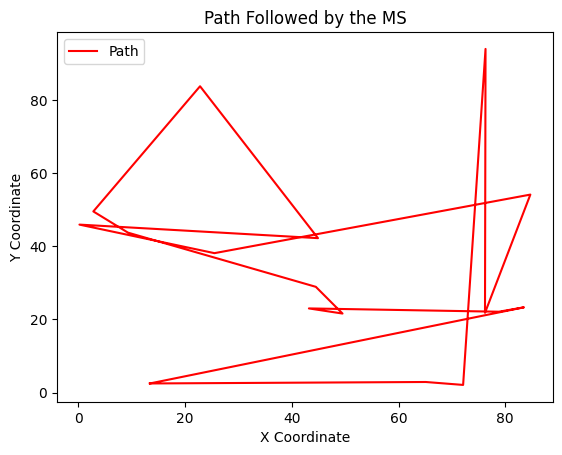

In [28]:
# Plot the path
plt.plot([x[i] for i in pbf], [y[i] for i in pbf], 'r-', label='Path')

# Add labels and legend
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Path Followed by the MS')
plt.legend()

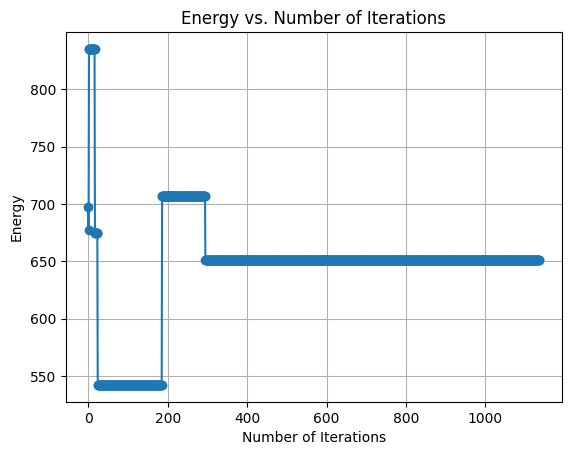

In [29]:
iterations = range(len(data))
plt.plot(iterations, data, marker='o')

# Add labels and title
plt.xlabel('Number of Iterations')
plt.ylabel('Energy')
plt.title('Energy vs. Number of Iterations')

# Show the plot
plt.grid()
plt.show()